# Влияние пандемии COVID-19 на рынок туризма в России 

Постановлением Правительства РФ от 03.04.2020 N 434 «Об утверждении перечня отраслей российской экономики, 
в наибольшей степени пострадавших в условиях ухудшения ситуации в результате распространения новой коронавирусной инфекции» 
деятельность туристических агентств и прочих организаций, предоставляющих услуги в сфере туризма отнесена к отраслям 
российской экономики, в наибольшей степени пострадавших в условиях ухудшения ситуации в результате распространения 
новой коронавирусной инфекции.
Чтобы косвенно оценить масштаб влияния, предлагаю обратиться к данным.

<blockquote>
Социально-экономические показатели регионов России//Росстат; обработка «Если быть точным», 2023. Условия использования: Creative Commons BY 4.0. URL:<a>https://tochno.st/datasets/regions_collection</a>
</blockquote>

In [193]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [194]:
data = pd.read_csv("section_6.csv", sep=";", encoding='utf-8')

In [195]:
# Сейчас нас интересуют только 2 показателя (переменные `tour_rus` и `tour_abroad`) и 3 стобца (`indicator_name`,`year`,`indicator_value`) из данных, 
# полученных из искомого CSV файла `section_6.csv`. Берем данные по всей России без разбивки по регионам, фильтруем данные по году 
# (после 2001 года, не включая 2003 год с учетом комментариев 6.9.1.1 и 6.9.2.1 к показателям 06090200 и 06090100).
tour_rus ="Численность российских туристов, обслуженных туристскими фирмами: Численность российских туристов, отправленных туристскими фирмами, в туры по россии"
tour_rus_data = data[["indicator_name","year","indicator_value"]].loc[(data["indicator_name"]==tour_rus)
                                                                      &(data["object_name"]=="Российская Федерация")
                                                                      &(data["year"]>2001)
                                                                      &(data["year"]!=2003)]
tour_abroad="Численность российских туристов, обслуженных туристскими фирмами: Численность российских туристов, отправленных туристскими фирмами, в зарубежные туры"
tour_abroad_data = data[["indicator_name","year","indicator_value"]].loc[(data["indicator_name"]==tour_abroad)
                                                                         &(data["object_name"]=="Российская Федерация")
                                                                         &(data["year"]>2001)
                                                                         &(data["year"]!=2003)]
# Рассчитываем общее количество туристов, отправленных туристскими фирмами в туры по России или в зарубежные туры.
tour_rus_data_indexed = pd.DataFrame(tour_rus_data[["year","indicator_value"]]).set_index("year")
tour_abroad_data_indexed = pd.DataFrame(tour_abroad_data[["year","indicator_value"]]).set_index("year")
tour_total = tour_rus_data_indexed["indicator_value"] + tour_abroad_data_indexed["indicator_value"]

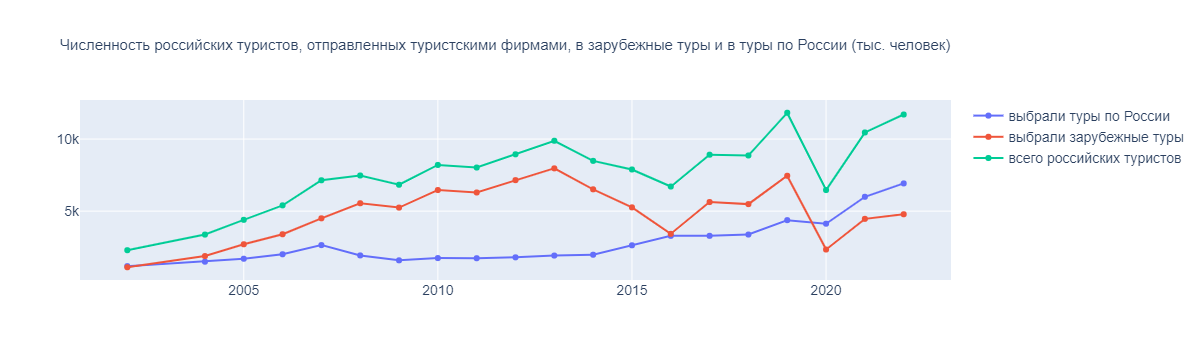

In [196]:
# Создаем фигуру с линейными графиками с помощью модуля `plotly.graph_objects`.
tour_data_plot = go.Figure()
tour_data_plot.add_trace(go.Scatter(
    x=tour_rus_data["year"],
    y=tour_rus_data["indicator_value"],
    name="выбрали туры по России",
    hoverinfo='x+y'
))

tour_data_plot.add_trace(go.Scatter(
    x=tour_abroad_data["year"],
    y=tour_abroad_data["indicator_value"],
    name="выбрали зарубежные туры",
    hoverinfo='x+y'
))

tour_data_plot.add_trace(go.Scatter(
    x=tour_total.index,
    y=tour_total,
    name="всего российских туристов",
    hoverinfo='x+y'
))

tour_data_plot.update_traces(mode="markers+lines")

tour_data_plot.update_layout(
                  font_family="arial",
                  font_size=14,
                  title=dict(text="Численность российских туристов, отправленных туристскими фирмами, в зарубежные туры и в туры по России (тыс. человек)",
                             font=dict(family="Arial",
                                       size=15)) 
                 )
tour_data_plot.show()

Анализ графика численности <b>туристов, отправленных в зарубежные туры</b> (красная линия на графике выше), показывает внушительную разницу между <b>пиком 2019 года и точкой спада в 2020 году</b> с самым низким значением показателя с 2004 года. Спад 2020 года прослеживается также на зеленой линии, которая иллюстрирует общее количество туристов из России. Разница на красной линии графика между 2019 и 2020 годами составила 5,12 млн человек, которые не отправились в тур за границу преимущественно по причине распространения пандемии COVID-19 (заболел турист или близкий родственник туриста, страна назначения ужесточила правила въезда и т.д.) По состоянию на 2022 год году показатель так и не приблизился к значениям до падения.<br>
Фиолетовая линия на графике выше иллюстрирует, что сфера туризма после перенесенного стресса 2020 года перестроилась на внутренний рынок, испытав <b>значительный скачок численности туристов, принявших решение отправиться в тур по России:</b> 5,99 млн в 2021 году и 6,92 млн в 2022 году по сравнению с 4,126 млн в 2020 году. Разница между 2021 и 2020 годами составила 1,87 млн туристов (около 45% от показателя 2020 года), между 2022 и 2020 2,8 млн человек (около 67% от показателя 2020 года).<br>
<b>Общее количество туристов из России</b>, отправленных туристскими фирмами в туры по России или в зарубежные туры, <b>к 2022 году вернулось к показателю 2019 года</b> преимущественно за счет увеличения количества туристов, выбравших туры по России вместо отпуска за границей. Разница между 2019 и 2020 годами составила 5,36 млн туристов (около 45% от показателя 2019 года), большая часть которой (5,12 млн человек) приходится на спад числа туристов, отправленных зарубеж.

In [199]:
# Здесь нас интересует показатель 06080100 'Туристские фирмы: Число туристских фирм'. Также берем данные по всей России, 
# после 2001 года, не включая 2003 год с учетом комментария 6.8.1.1 к показателю.
travel_agencies_data = data[["indicator_name","year","indicator_value"]].loc[(data["indicator_name"]=="Туристские фирмы: Число туристских фирм")
                                                                            &(data["object_name"]=="Российская Федерация")
                                                                            &(data["year"]>2001)
                                                                            &(data["year"]!=2003)]

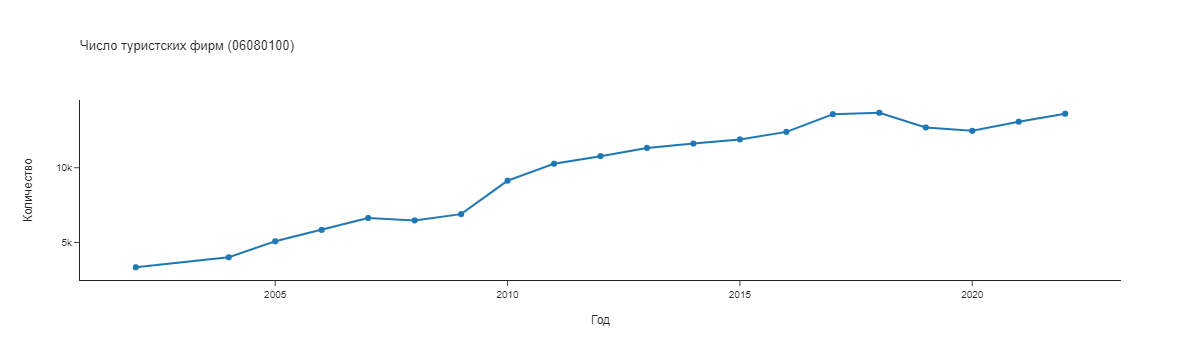

In [198]:
# Создаем фигуру с линейным графиком с помощью модуля `plotly.express`.
travel_agencies_plot = px.line(x=travel_agencies_data["year"],
             y=travel_agencies_data["indicator_value"],
             labels={"x": "Год", "y": "Количество"},
             title="Число туристских фирм (06080100)",
             markers=True,
             template="simple_white")

travel_agencies_plot.update_layout(showlegend=True,
                  font_family="arial",
                  font_size=10,
                  title=dict(font=dict(family="Arial",
                                       size=13),
                             xref='paper',
                             x=0.0, 
                             xanchor="left")
                 )
travel_agencies_plot.show()

На графике количества туристских фирм прослеживается общий положительный тренд за исключением участка падения с 2007 по 2010 годы (по всей видимости, вызванного мировым кризисом), на участке с 2017 по 2018 года наблюдается плато, а с 2019 года - спад и постепенное наращение показателя к 2022 году. При анализе графика видно, что за 2 года (2019 и 2020) количество туристических фирм по всей России сократилось на 1211. <br>Поскольку значительный спад показателя начался уже в 2019 году, только в конце которого в Китае появились первые сообщения о случаях заболевания COVID-19, можно сделать предположение, что пандемия не могла запустить тренд на снижение, имел место другой фактор. Разница между 2019 и 2020 годами составила всего 227, в связи с чем можно предположить, что несмотря на стресс 2020 года, большинство туристких фирм не ушли с рынка. 

## Вывод

Проанализировав данные по нескольким показателям, касаемых состояния сферы туризма, можно сделать предварительный вывод о том, что пандемия COVID-19 в значительной степени повлияла на туристический рынок. <br>Анализ численности российских туристов, отправленных туристскими фирмами, в туры по России или зарубежные туры, продемонстрировал спад 2020 года, который составил около 45% от показателя предыдущего года. Также анализ показал, что в следующие после спада годы сфера туризма перестроилась и вместо зарубежных направлений туристов стали чаще отправлять в туры по России: за 2 года турпоток увеличился на 67% по сравнению со значением показателя в 2020 году.<br> Анализ динамики числа туристских фирм не выявил явной зависимости тренда от пандемии COVID-19.